In [ ]:
Name:Hemanth Kumar Mandala
Reg.No:AIE23115
Lab Assignment-4
GitHub link: https://github.com/Hemanth-2809/Machine-Learning

In [ ]:
Q1.
Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data.
Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

file_path = "Obesity prediction.csv"
data = pd.read_csv(file_path)

features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
X = data[features]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Obesity"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return accuracy_score(y_true, y_pred), cm, \
        precision_score(y_true, y_pred, average='weighted'), \
        recall_score(y_true, y_pred, average='weighted'), \
        f1_score(y_true, y_pred, average='weighted')

best_k = 1
best_accuracy = 0
for k in range(3, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy:
        best_k = k
        best_accuracy = acc

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_acc, train_cm, train_prec, train_rec, train_f1 = evaluate(y_train, y_train_pred)
test_acc, test_cm, test_prec, test_rec, test_f1 = evaluate(y_test, y_test_pred)

print(f"Best k: {best_k}")
print(f"Training Accuracy: {train_acc:.3f}, Testing Accuracy: {test_acc:.3f}")
print(f"\nConfusion Matrix (Training):\n{train_cm}\nConfusion Matrix (Testing):\n{test_cm}")
print(f"\nTraining - Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1 Score: {train_f1:.3f}")
print(f"Testing - Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1 Score: {test_f1:.3f}")

if train_acc > 0.95 and test_acc < (train_acc - 0.2):
    print("\nThe model is overfitting.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("\nThe model is underfitting.")
else:
    print("\nThe model has a good balance.")


Best k: 3
Training Accuracy: 0.919, Testing Accuracy: 0.801

Confusion Matrix (Training):
[[181   2   0   0   0   2   1]
 [ 27 141   3   0   0  13  10]
 [  0   0 240   0   0   3   6]
 [  0   0   1 207   1   0   0]
 [  0   0   0   0 226   0   0]
 [  5  17   4   2   0 164  10]
 [  0   6   4   0   0   3 198]]
Confusion Matrix (Testing):
[[77  6  0  0  0  1  2]
 [18 43  4  0  0 14 14]
 [ 0  3 91  3  0  1  4]
 [ 0  0  2 86  0  0  0]
 [ 0  0  0  0 98  0  0]
 [ 2 13  2  0  0 61 10]
 [ 2  8 10  1  0  6 52]]

Training - Precision: 0.919, Recall: 0.919, F1 Score: 0.917
Testing - Precision: 0.794, Recall: 0.801, F1 Score: 0.796

The model has a good balance.


In [ ]:
Q2.
 Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

def split_data(data, features, target, test_size=0.2, random_state=42):
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def predict(model, X_test):
    return model.predict(X_test)

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

def main():
    file_path = "Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"

    data = load_data(file_path, sheet_name)
    X_train, X_test, y_train, y_test = split_data(data, ["Open", "High", "Low"], "Price")

    model = train_linear_model(X_train, y_train)
    y_pred = predict(model, X_test)

    mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

if __name__ == "__main__":
    main()


MSE: 188.4684
RMSE: 13.7284
MAPE: 0.53%
R² Score: 0.9972


In [ ]:
Q3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - Blue & class1 – Red). 
Make a scatter plot of the training data and color the points as per their class color. Observe the plot.


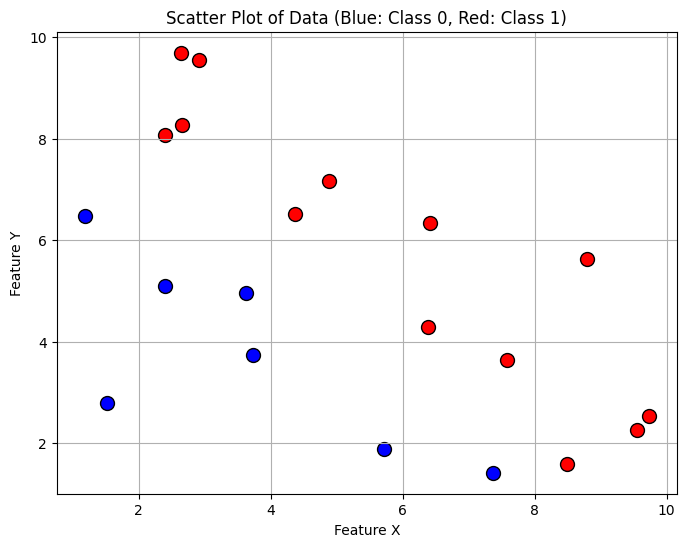

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_data(num_points=20, value_range=(1, 10)):
    np.random.seed(42)
    x = np.random.uniform(value_range[0], value_range[1], num_points)
    y = np.random.uniform(value_range[0], value_range[1], num_points)
    return x, y

def assign_classes(x, y, threshold=10):
    return (x + y > threshold).astype(int)

def plot_data(x, y, labels):
    plt.figure(figsize=(8, 6))
    
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color='red' if labels[i] else 'blue', edgecolors='black', s=100)

    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("Scatter Plot of Data (Blue: Class 0, Red: Class 1)")
    plt.grid(True)
    plt.show()

X, Y = generate_random_data()
labels = assign_classes(X, Y)
plot_data(X, Y, labels)


In [ ]:
Q4.Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their predicted class colors (all points predicted class0 are labeled blue color).
Observe the color spread and class boundary lines in the feature space.

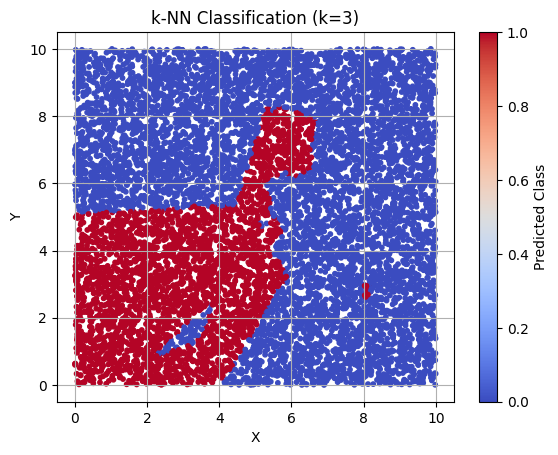

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_data(points, x_range, y_range, with_labels=False):
    X = np.random.uniform(x_range[0], x_range[1], (points, 2))
    y = np.random.choice([0, 1], size=points) if with_labels else None
    return X, y

def train_and_predict(X_train, y_train, X_test, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def plot_results(X, predictions):
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"k-NN Classification (k=3)")
    plt.colorbar(label="Predicted Class")
    plt.grid(True)
    plt.show()

X_train, y_train = generate_data(20, (1, 10), (1, 10), with_labels=True)
X_test, _ = generate_data(10000, (0, 10), (0, 10))
y_pred = train_and_predict(X_train, y_train, X_test, k=3)
plot_results(X_test, y_pred)


In [ ]:
A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

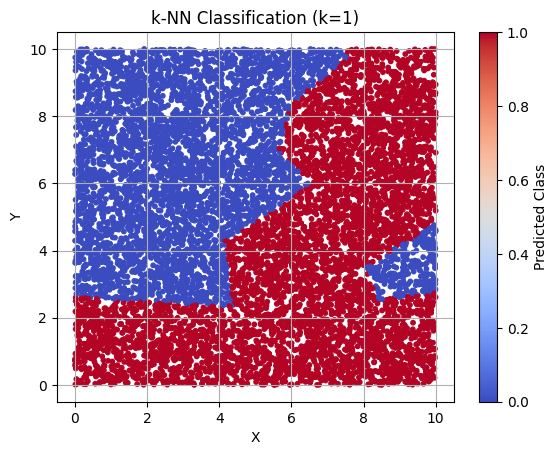

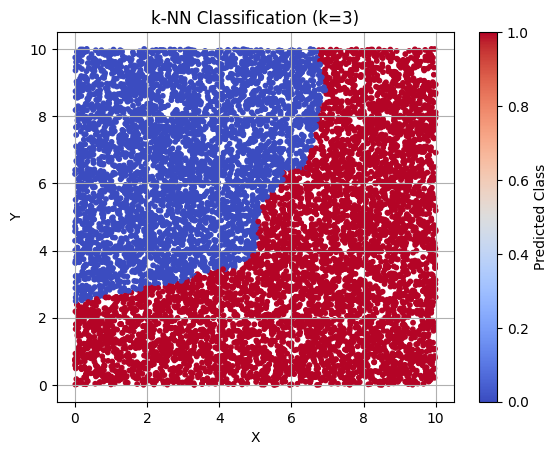

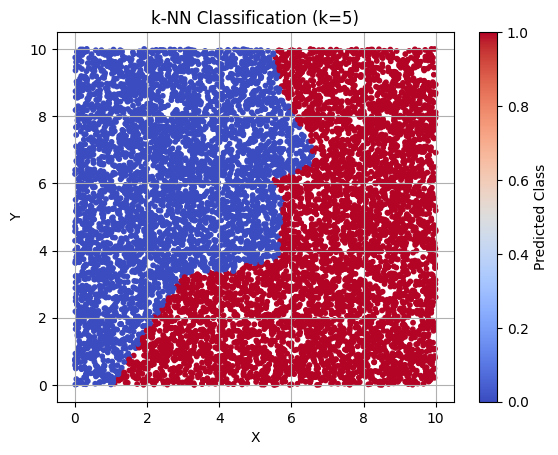

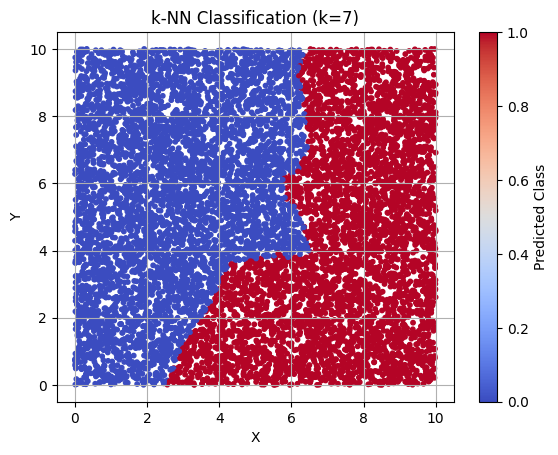

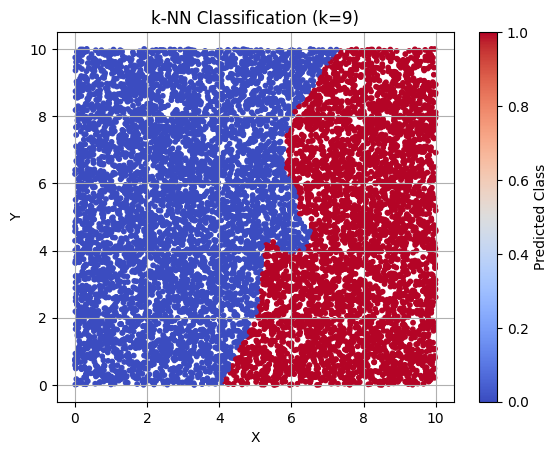

C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", 

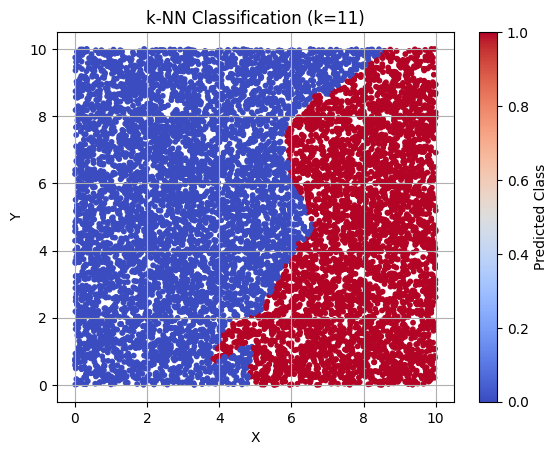

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_data(points, x_range, y_range, labeled=False):
    X = np.random.uniform(x_range[0], x_range[1], (points, 2))
    y = np.random.choice([0, 1], size=points) if labeled else None
    return X, y

def train_and_predict(X_train, y_train, X_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def plot_results(X, predictions, k):
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"k-NN Classification (k={k})")
    plt.colorbar(label="Predicted Class")
    plt.grid(True)
    plt.show()

X_train, y_train = generate_data(20, (1, 10), (1, 10), labeled=True)
X_test, _ = generate_data(10000, (0, 10), (0, 10))

for k in [1, 3, 5, 7, 9, 11]:
    y_pred = train_and_predict(X_train, y_train, X_test, k)
    plot_results(X_test, y_pred, k)


In [ ]:
Q6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.

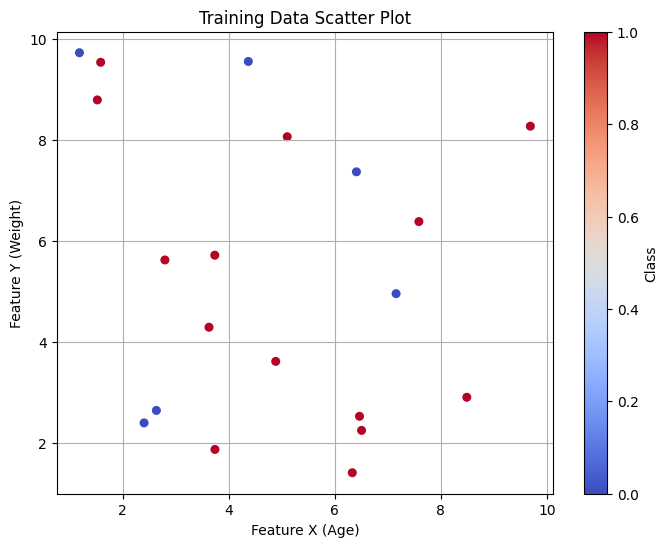

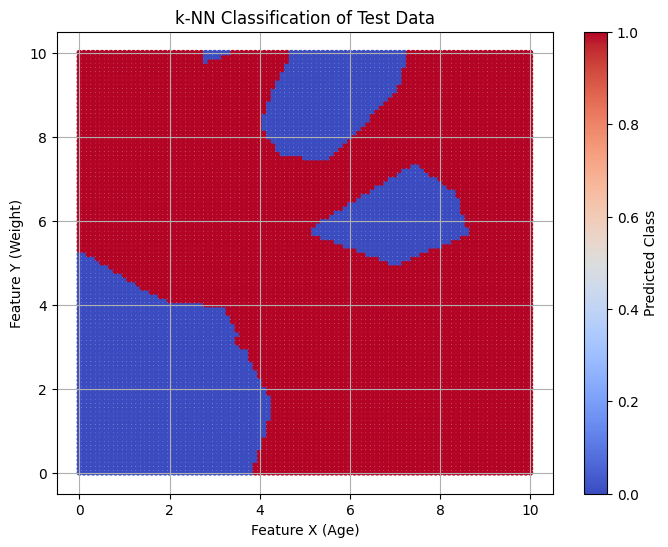

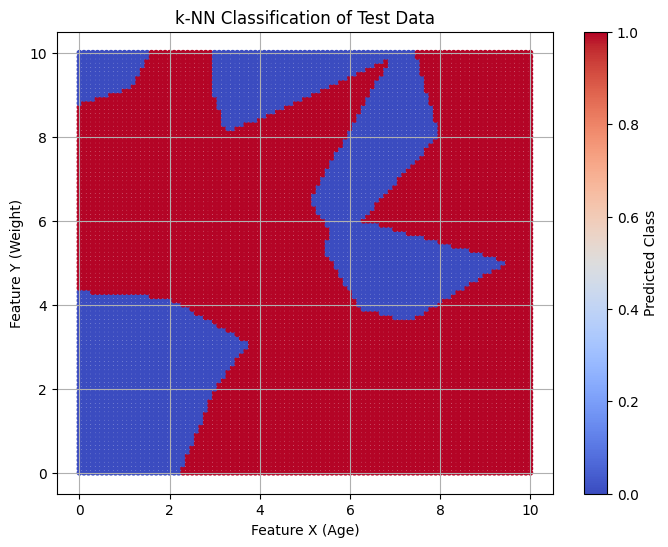

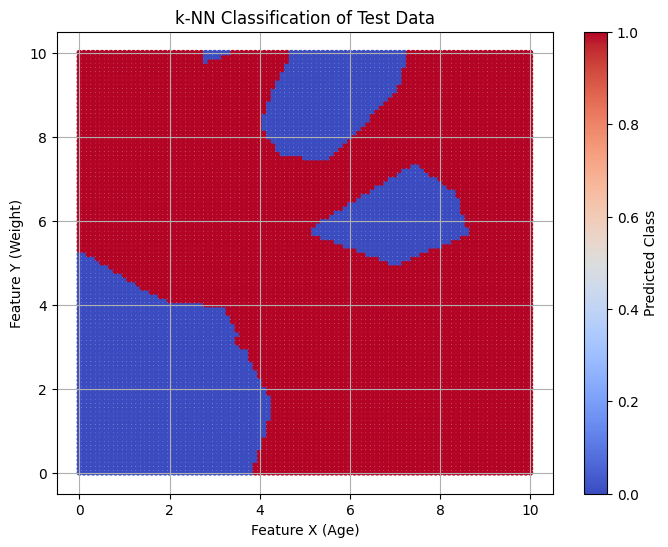

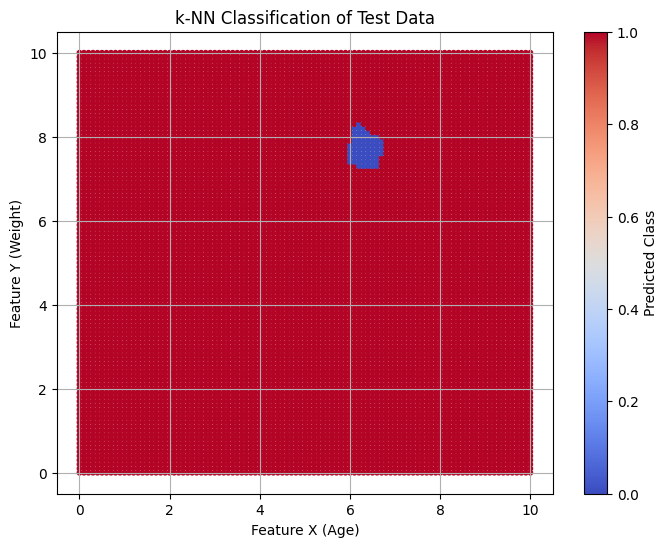

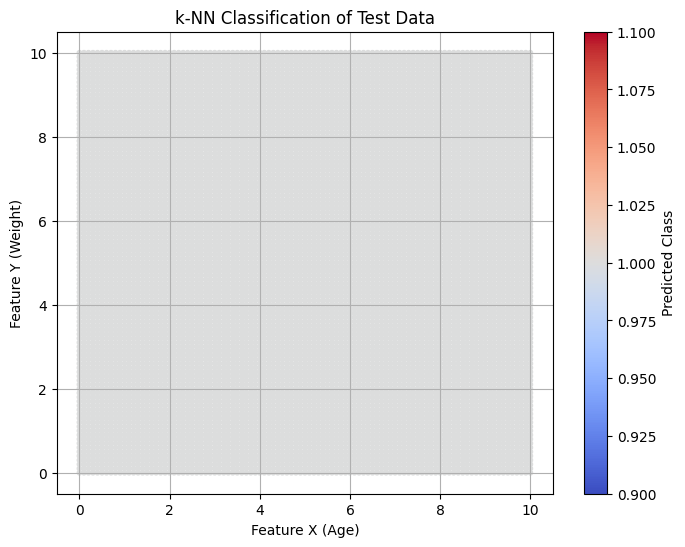

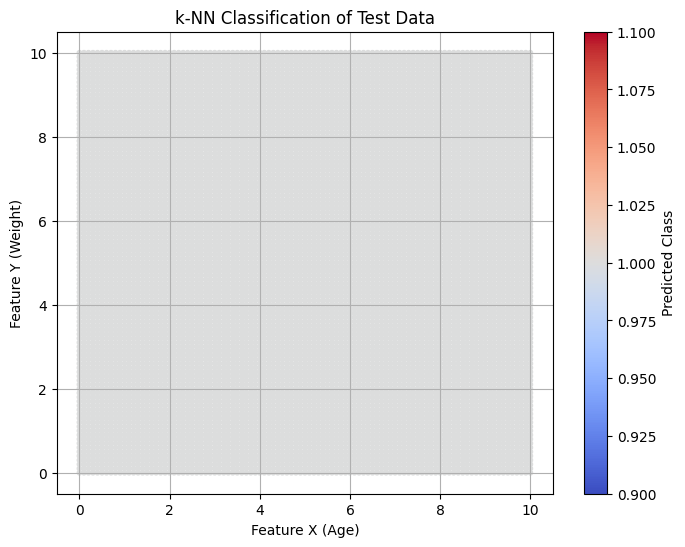

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Obesity prediction.csv"
data = pd.read_csv(file_path)

# Select relevant features and target
feature_cols = ["Age", "Weight"]  # Two numerical features
label_col = "Obesity"

# Encode target variable as numeric labels
label_encoder = LabelEncoder()
data[label_col] = label_encoder.fit_transform(data[label_col])

# Generate 20 random training points
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.random.choice([0, 1], size=20)  # Assign random class labels

# Scatter plot of training data
def plot_training_data(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)
    plt.xlabel("Feature X (Age)")
    plt.ylabel("Feature Y (Weight)")
    plt.title("Training Data Scatter Plot")
    plt.colorbar(label="Class")
    plt.grid(True)
    plt.show()

plot_training_data(X_train, y_train)

# Generate test data
x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
X_test = np.array(np.meshgrid(x_vals, y_vals)).T.reshape(-1, 2)

# Train k-NN model and classify test data
def train_knn(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

def classify_and_plot(knn, X_test):
    y_pred = knn.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", s=10)
    plt.xlabel("Feature X (Age)")
    plt.ylabel("Feature Y (Weight)")
    plt.title("k-NN Classification of Test Data")
    plt.colorbar(label="Predicted Class")
    plt.grid(True)
    plt.show()

# Train and visualize test data classification
knn_model = train_knn(X_train, y_train, k=3)
classify_and_plot(knn_model, X_test)

# Repeat for different k values
def repeat_for_multiple_k(X_train, y_train, X_test, k_values=[1, 3, 5, 7, 10]):
    for k in k_values:
        knn = train_knn(X_train, y_train, k)
        classify_and_plot(knn, X_test)

repeat_for_multiple_k(X_train, y_train, X_test)

In [ ]:
A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning. 
    

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

file_path = "Obesity prediction.csv"
data = pd.read_csv(file_path)

feature_cols = ["Age", "Weight"]
label_col = "Obesity"

label_encoder = LabelEncoder()
data[label_col] = label_encoder.fit_transform(data[label_col])

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols].values, data[label_col].values, test_size=0.3, random_state=42)

param_dist = {'n_neighbors': np.random.randint(1, 21, 10)}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_k_random = random_search.best_params_['n_neighbors']
best_score_random = random_search.best_score_

print(f"Best k value (Randomized Search): {best_k_random}")
print(f"Best cross-validation accuracy: {best_score_random:.4f}")

best_knn_random = KNeighborsClassifier(n_neighbors=best_k_random)
best_knn_random.fit(X_train, y_train)

test_pred_random = best_knn_random.predict(X_test)
test_accuracy_random = accuracy_score(y_test, test_pred_random)

print(f"Test Accuracy with best k ({best_k_random}): {test_accuracy_random:.4f}")


Best k value (Randomized Search): 3
Best cross-validation accuracy: 0.7955
Test Accuracy with best k (3): 0.7839
